In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Drug_SideEffects_new.csv')

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,SideEffects
0,75+,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Scott Robertson,White,Mild
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rodney Wright,White,Mild
2,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,Andrew Miller,Hispanic,Mild
3,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,Christina Anthony,Black,Mild
4,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,Paul Warren,Asian,Moderate


In [4]:
# Drop unwanted columns
columns_to_drop = ['Condition', 'Date','EaseofUse','Effectiveness','Reviews','Satisfaction','UsefulCount','Name','Drug','Sides']
df = df.drop(columns_to_drop, axis=1)
df.head()

,Age,DrugId,Sex,Race,SideEffects
0,75+,146724,Male,White,Mild
1,25-34,146724,Female,White,Mild
2,25-34,163180,Female,Hispanic,Mild
3,45-54,163180,Female,Black,Mild
4,55-64,9800,Male,Asian,Moderate


In [16]:
df.head()

,Age,DrugId,Sex,Race,SideEffects
0,10,146724,1,3,Mild
1,3,146724,0,3,Mild
2,3,163180,0,2,Mild
3,6,163180,0,1,Mild
4,7,9800,1,0,Moderate


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Race'] = le.fit_transform(df['Race'])

In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into features and target variable
X = df.drop(['SideEffects'],axis=1)
y = df['SideEffects']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Classification Models

In [8]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [9]:
# Function to train and evaluate models
def train_and_evaluate_models(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results
    print("Confusion matrix: ", cm)
    print("Classification Report:")
    print(report)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

In [10]:
# Train and evaluate RandomForestClassifier
model = RandomForestClassifier()
train_and_evaluate_models(model, X_train, y_train, X_test, y_test)

Confusion matrix:  [[48387   410   313]
 [  606  3694    97]
 [  496    96  1924]]
Classification Report:
              precision    recall  f1-score   support

        Mild       0.98      0.99      0.98     49110
    Moderate       0.88      0.84      0.86      4397
         Nil       0.82      0.76      0.79      2516

    accuracy                           0.96     56023
   macro avg       0.89      0.86      0.88     56023
weighted avg       0.96      0.96      0.96     56023

Accuracy: 0.9639790800207058
Precision: 0.9631354039552922
Recall: 0.9639790800207058
F1-score: 0.9634588473189306


In [11]:
# Train and evaluate LogisticRegression
model = LogisticRegression()
train_and_evaluate_models(model, X_train, y_train, X_test, y_test)

Confusion matrix:  [[49107     3     0]
 [ 4397     0     0]
 [ 2516     0     0]]
Classification Report:
              precision    recall  f1-score   support

        Mild       0.88      1.00      0.93     49110
    Moderate       0.00      0.00      0.00      4397
         Nil       0.00      0.00      0.00      2516

    accuracy                           0.88     56023
   macro avg       0.29      0.33      0.31     56023
weighted avg       0.77      0.88      0.82     56023

Accuracy: 0.8765507023900898
Precision: 0.768429221606164
Recall: 0.8765507023900898
F1-score: 0.8189366497551093


In [12]:
# Train and evaluate LGBMClassifier
import lightgbm as lgb
model = lgb.LGBMClassifier()
train_and_evaluate_models(model, X_train, y_train, X_test, y_test)

Confusion matrix:  [[48723   248   139]
 [ 2159  2199    39]
 [ 1645    51   820]]
Classification Report:
              precision    recall  f1-score   support

        Mild       0.93      0.99      0.96     49110
    Moderate       0.88      0.50      0.64      4397
         Nil       0.82      0.33      0.47      2516

    accuracy                           0.92     56023
   macro avg       0.88      0.61      0.69     56023
weighted avg       0.92      0.92      0.91     56023

Accuracy: 0.9235849561787123
Precision: 0.9191119907867402
Recall: 0.9235849561787123
F1-score: 0.9114795830735137


In [13]:
# Train and evaluate XGBoost Classifier
import xgboost as xgb

# Encode the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train and evaluate the model
train_and_evaluate_models(model, X_train, y_train_encoded, X_test, y_test_encoded)

Confusion matrix:  [[49073    22    15]
 [  494  3890    13]
 [  385    35  2096]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49110
           1       0.99      0.88      0.93      4397
           2       0.99      0.83      0.90      2516

    accuracy                           0.98     56023
   macro avg       0.98      0.91      0.94     56023
weighted avg       0.98      0.98      0.98     56023

Accuracy: 0.9827927815361548
Precision: 0.9828490150312853
Recall: 0.9827927815361548
F1-score: 0.9822530068750405


Based on the evaluation of various machine learning algorithms, XGBoost consistently outperformed the other models with the highest metrics, making it the preferred choice for this task. Therefore, XGBoost is being selected as the algorithm of choice for this specific scenario.

### Apply cross-validation to assess the model's behavior and potential overfitting

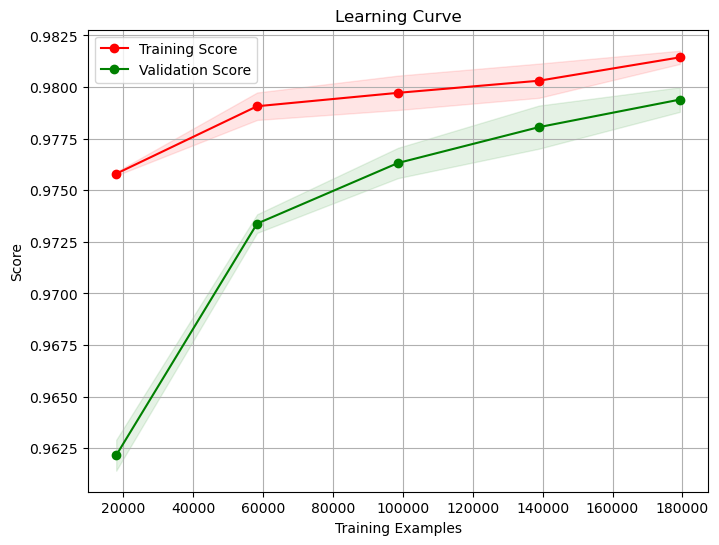

Cross-Validation Scores: [0.97942791 0.97927172 0.98047659 0.9786916  0.97909322]
Mean Accuracy: 0.9793922084876613
Standard Deviation: 0.0005953038920309403


In [19]:
# Import cross-validation and learning_curve libraries
from sklearn.model_selection import learning_curve, cross_val_score

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Score')
    plt.legend(loc='best')
    plt.show()
    
# Function to evaluate model with cross-validation
def evaluate_with_cross_validation(estimator, X, y, cv):
    scores = cross_val_score(estimator, X, y, cv=cv, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))
    print("Standard Deviation:", np.std(scores))
    
# Plot learning curve and evaluate with cross-validation for XGBoost
plot_learning_curve(model, X_train, y_train_encoded, cv=5)
evaluate_with_cross_validation(model, X_train, y_train_encoded, cv=5)

The convergence of the learning curves further suggests that the model is not overfitting and has learned the underlying patterns well.

The consistent cross-validation results with a mean accuracy of approximately 0.9794 and low standard deviation suggest that the XGBoost model performs well and can reliably classify the target variable, indicating its suitability for the classification task. Furthermore, the model's stable performance across different folds indicates that it is not overfitting the training data.

### Conclusion

In conclusion, the XGBoost model demonstrates strong performance with high accuracy, precision, recall, and F1-score. It exhibits reliable performance across subsets of the data, as indicated by consistent cross-validation scores and the convergence of learning curves. Overall, the model shows the ability to effectively classify the target variable while avoiding overfitting.